## Week_12_Water_Jug_Problem

### Water Jug

&nbsp;

Water jug is an interesting problem. Basically you have two water jugs with different volume. The idea is to get certain amount of water inside one of the jugs without taking any measurement. All you can do is to pour water from one jug to the other. There are different ways to solve this problem. 
You can take dynamic programming approach, algebra approach or graph theory approach. Here, we intend to discuss BFS, DFS and Dijkstra from graph theory approach.

Details of water jug problem can be found in the following link

https://www.geeksforgeeks.org/puzzle-water-jug-problem/

&nbsp;

In [1]:
import os
os.chdir('C:\Dev\Jupyter Notebook\Math_Discrete\Week 12')
import matplotlib.pyplot as plt
import matplotlib.animation as pltani

#graph adt
#check the below link for more details
# https://github.com/je-suis-tm/graph-theory/blob/master/graph.py
import graph

In [2]:
#assume the big jug is 5 gallon, the small jug is 3 gallon
big=5
small=3

In [3]:
#to add edges between vertices
#lets look at all the possible scenarios
#there are eight scenarios
def check_around(big,small):
    
    ADT=graph.graph()

    for i in range(big+1):
        for j in range(small+1):

            #when big jug is empty
            #we can always fill up big jug
            if i==0:

                ADT.append((0,j),(big,j),1)

            #when small jug is empty
            #we can always fill up small jug
            if j==0:

                ADT.append((i,0),(i,small),1)

            #when small jug is not empty
            #we can always empty the small jug
            #that condition avoids (0,0) to (0,0)
            if j!=0:

                ADT.append((i,j),(i,0),1)

            #when big jug is not empty
            #we can always empty the big jug
            #that condition avoids (0,0) to (0,0)
            if i!=0:

                ADT.append((i,j),(0,j),1)

            #when big jug is not filled up
            #we pour water from small jug into the big jug
            #we dont have water left in the small jug 
            #and the big jug is filled up
            if i<big and j<=big-i:

                ADT.append((i,j),(i+j,0),1)

            #when big jug is not filled up
            #we pour water from small jug into the big jug
            #we still got some water left in the small jug 
            #and the big jug is filled up
            if i<big and j>big-i:

                ADT.append((i,j),(big,j-big+i),1)

            #when small jug is not filled up
            #we pour water from big jug into the small jug
            #we dont have water left in the big jug 
            #and the small jug is filled up
            if j<small and i<=small-j:

                ADT.append((i,j),(0,j+i),1)

            #when small jug is not filled up
            #we pour water from big jug into the small jug
            #we still have water left in the big jug 
            #and the small jug is filled up
            if j<small and i>small-j:

                ADT.append((i,j),(i-small+j,small),1)
                
    return ADT

In [4]:
#generate graph adt
ADT=check_around(big,small)

In [5]:
#bfs demonstrates the capability of finding an optimal for any graph adt
#details of bfs can be found in the following link
# https://github.com/je-suis-tm/graph-theory/blob/master/BFS%20DFS%20on%20DCG.ipynb
len_of_process_bfs,process_bfs=graph.bfs_path(ADT,(0,0),(4,0))
num_of_v_bfs=len([i for i in ADT.route() if ADT.route()[i]==1])
ADT.clear(whole=True)

print(f'length of the process:',len_of_process_bfs)
print(f'number of vertices BFS has travelled:',num_of_v_bfs)

length of the process: 7
number of vertices BFS has travelled: 15


In [6]:
#dfs traveled fewer vertices
#even though the result is not the optimal
#details of dfs can be found in the following link
# https://github.com/je-suis-tm/graph-theory/blob/master/BFS%20DFS%20on%20DCG.ipynb
len_of_process_dfs,process_dfs=graph.dfs_path(ADT,(0,0),(4,0))
num_of_v_dfs=len([i for i in ADT.route() if ADT.route()[i]==1])
ADT.clear(whole=True)

print(f'length of the process:',len_of_process_dfs)
print(f'number of vertices DFS has travelled:',num_of_v_dfs)

length of the process: 10
number of vertices DFS has travelled: 11


In [7]:
#dijkstra is guaranteed to find the optimal
#details of dijkstra could be found in the following link
# https://github.com/je-suis-tm/graph-theory/blob/master/dijkstra%20shortest%20path.ipynb
len_of_process_dijkstra,process_dijkstra=graph.dijkstra(ADT,(0,0),(4,0))
num_of_v_dijkstra=len([i for i in ADT.route() if ADT.route()[i]==1])
ADT.clear(whole=True)

print(f'length of the process:',len_of_process_dijkstra)
print(f'number of vertices Dijkstra has travelled:',num_of_v_dijkstra)

length of the process: 7
number of vertices Dijkstra has travelled: 15


In [8]:
#viz water jug change
def draw_waterjug(ind,*args):
    
    ax,process=args

    ax.collections.clear()
    
    #viz water
    Y_big,Y_small=process[ind][0],process[ind][1]
    xval_big=[i/10 for i in range(6,15)]
    xval_small=[i/10 for i in range(26,35)]
    yval_big=[big/10*i for i in range(Y_big*2+1)]
    yval_small=[small/10*i for i in range(Y_small*2+1)]

    ax.scatter(sorted(xval_big*len(yval_big)),
               yval_big*len(xval_big),
               color='cyan' if Y_big!=0 else 'w',
               s=2)
    ax.scatter(sorted(xval_small*len(yval_small)),
               yval_small*len(xval_small),
               color='cyan' if Y_small!=0 else 'w',
               s=2)


MovieWriter ffmpeg unavailable; using Pillow instead.


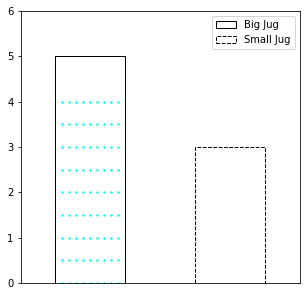

In [9]:
fig,ax=plt.subplots(figsize=(5,5))

#viz jug
bigjug=plt.Rectangle((0.5,0),1,big,fill=False,
                     label='Big Jug')
smalljug=plt.Rectangle((2.5,0),1,small,fill=False,
                       linestyle='--',
                       label='Small Jug')
plt.gca().add_patch(bigjug)
plt.gca().add_patch(smalljug)

#chic design
ax.set_xticks([])
ax.set_xlim(0,4)
ax.set_ylim(0,big+1)
ax.legend()

#create animations
anim=pltani.FuncAnimation(fig,draw_waterjug,
                          frames=len(process_dijkstra),
                          interval=700,
                          fargs=(ax,process_dijkstra))
anim.save('water jug.gif')

![alt text](./preview/water jug.gif)